Real estate price prediction - A data science project

Overview

In this data science project, I focus on the development and implementation of a predictive model to forecast real estate prices. The aim is to use machine learning techniques to create accurate and reliable price forecasts for real estate based on various characteristics such as location, size, year of construction and amenities.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Laden der Daten
file_path = '/Users/caner/Desktop/Data Science/HousePrice/data.csv' 
data = pd.read_csv(file_path)


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
print(data.head(10))

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   
5  2014-05-02 00:00:00   490000.0       2.0       1.00          880      6380   
6  2014-05-02 00:00:00   335000.0       2.0       2.00         1350      2560   
7  2014-05-02 00:00:00   482000.0       4.0       2.50         2710     35868   
8  2014-05-02 00:00:00   452500.0       3.0       2.50         2430     88426   
9  2014-05-02 00:00:00   640000.0       4.0       2.00         1520      6200   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0  

In [4]:
data.tail(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4580,2014-07-07 00:00:00,282508.888889,3.0,1.00,1560,7552,1.0,0,0,4,910,650,1948,0,228 NE 174th St,Shoreline,WA 98155,USA
4581,2014-07-07 00:00:00,473200.000000,3.0,1.50,1740,4200,1.5,0,0,4,1640,100,1920,0,6714 4th Ave NW,Seattle,WA 98117,USA
4582,2014-07-07 00:00:00,406062.500000,2.0,1.00,1290,4650,1.0,0,0,4,1290,0,1906,1990,312 NE 81st St,Seattle,WA 98115,USA
4583,2014-07-07 00:00:00,282766.666667,4.0,2.00,1700,8640,1.0,0,0,3,850,850,1955,2010,3706 140th Ave SE,Bellevue,WA 98006,USA
4584,2014-07-07 00:00:00,486445.833333,3.0,1.75,1880,10032,1.0,0,0,4,1880,0,1984,0,13345 SE 55th Pl,Bellevue,WA 98006,USA
4585,2014-07-07 00:00:00,486895.000000,3.0,1.00,1890,3330,1.5,0,0,4,1390,500,1901,0,4324 Dayton Ave N,Seattle,WA 98103,USA
4586,2014-07-07 00:00:00,430277.777778,3.0,2.25,1620,1075,3.0,0,0,3,1540,80,2009,0,972 4th Ave NE,Issaquah,WA 98029,USA
4587,2014-07-08 00:00:00,229629.500000,2.0,1.00,770,8149,1.0,0,0,3,770,0,1948,1994,16040 28th Ave NE,Shoreline,WA 98155,USA
4588,2014-07-08 00:00:00,0.000000,4.0,2.25,2890,18226,3.0,1,4,3,2890,0,1984,0,3227-3399 Mountain View Ave N,Renton,WA 98056,USA
4589,2014-07-08 00:00:00,182805.000000,3.0,1.00,1040,8892,1.0,0,0,4,800,240,1958,1972,1028 SW 307th St,Federal Way,WA 98023,USA


In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Descriptive statistics of the real estate data set

Price range: From 0 to over 26 million USD, with a considerable spread.
Living space: Ranges from small apartments to large estates.
Average number of bedrooms and bathrooms: 3.4 and 2.16 respectively.
Lot sizes: Very diverse, from townhouses to large estates.
Year built: Most homes are a few decades old.
Renovations: Few homes have been officially renovated.
Special features: Few waterfront homes; views vary widely.

These statistics provide important insights into the distribution and characteristics of the properties in the dataset and are crucial for subsequent data analysis and modeling.


Treatment of zero and extreme value

In [6]:
zero_bedrooms_count = data[data['bedrooms'] == 0].shape[0]

In [7]:
zero_bathrooms_count = data[data['bathrooms'] == 0].shape[0]

In [8]:
zero_price_count = data[data['price'] == 0].shape[0]

In [9]:
print(f"Number of entries with 0 bedrooms:{zero_bedrooms_count}")

Number of entries with 0 bedrooms:2


In [10]:
print(f"Number of entries with 0 bathrooms:{zero_bathrooms_count}")

Number of entries with 0 bathrooms:2


In [11]:
print(f"Number of entries with price 0 USD:{zero_price_count}")

Number of entries with price 0 USD:49


In [12]:
data_cleaned = data[data['price'] > 0]

In [13]:
data_cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Explorative Datenanalyse (EDA) - Distributions of the main variables

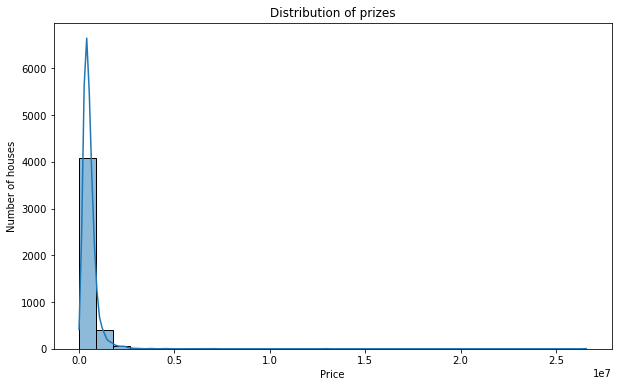

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True, bins=30)
plt.title('Distribution of prizes')
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.show()

Given the uneven distribution of our dataset with a clustering of homes in the lower price range, I will perform feature engineering to identify the specific factors that characterize more expensive homes and thereby improve the predictive accuracy of our model for this price segment.

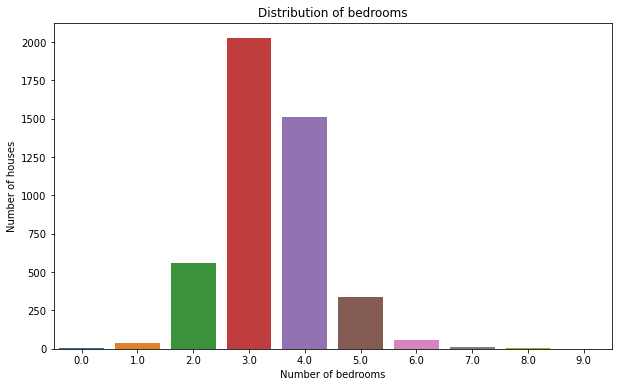

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='bedrooms')
plt.title('Distribution of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of houses')
plt.show()

The distribution of bedrooms in our dataset reflects a realistic spread that is representative of the housing market, with most homes having three to four bedrooms; this reliable database provides a solid basis for developing accurate prediction models for house prices.

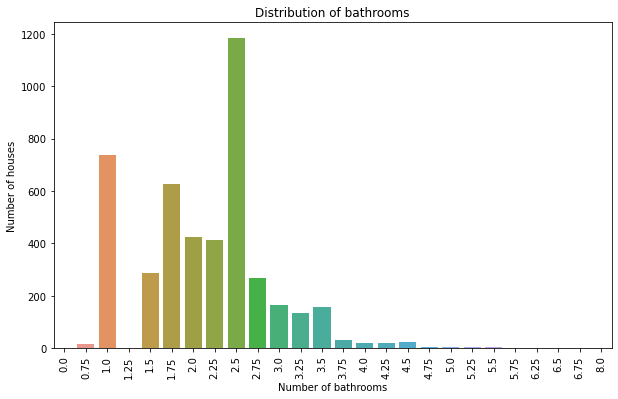

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='bathrooms')
plt.title('Distribution of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Number of houses')
plt.xticks(rotation=90)
plt.show()

The distribution of bathrooms shows a realistic and balanced representation of the market data, with the focus on common bathroom numbers supporting the creation of a robust predictive model for the real estate market.

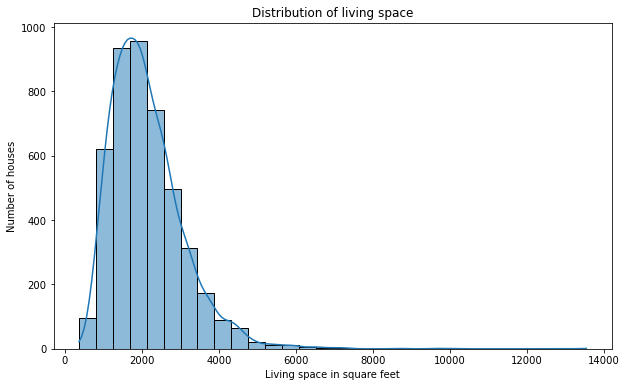

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['sqft_living'], kde=True, bins=30)
plt.title('Distribution of living space')
plt.xlabel('Living space in square feet')
plt.ylabel('Number of houses')
plt.show()

The histogram with the superimposed KDE line shows a largely normally distributed living space size of the houses in the data set, without significant outliers, which indicates a high-quality data basis for the correlation analysis and model training.

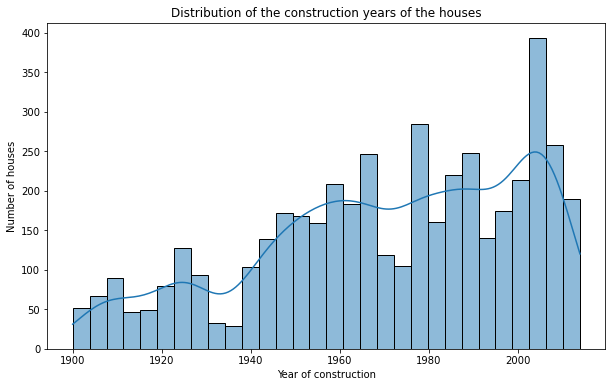

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['yr_built'], bins=30, kde=True)
plt.title('Distribution of the construction years of the houses')
plt.xlabel('Year of construction')
plt.ylabel('Number of houses')
plt.show()


The graph illustrates the distribution of the years of construction of houses and shows clear trends and changes in construction volume over the course of the 20th century, reflecting important historical and economic developments in the US real estate market.

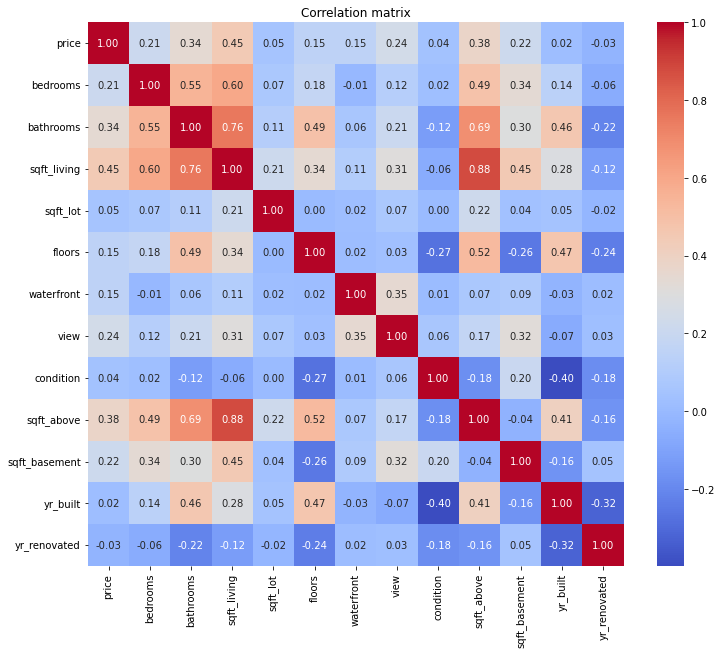

In [19]:
corr_matrix = data_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()
